Import Liberies


In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model  import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error,mean_absolute_error
from pmdarima import auto_arima

In [2]:
plt.style.use("fivethirtyeight")

Get Data


In [3]:
dataSet=pd.read_csv('./AAPL (1).csv')
dataSet["Date"] = pd.to_datetime(dataSet["Date"], infer_datetime_format=True)
dataset = dataSet.set_index("Date")

Filtter DataFrame

In [4]:
df=dataset["Close"]
df


Date
2012-01-03    14.686786
2012-01-04    14.765714
2012-01-05    14.929643
2012-01-06    15.085714
2012-01-09    15.061786
                ...    
2019-12-05    66.394997
2019-12-06    67.677498
2019-12-09    66.730003
2019-12-10    67.120003
2019-12-11    67.692497
Name: Close, Length: 1999, dtype: float64

Plotting Data

<Axes: title={'center': "AAPL 'Close'"}, xlabel='Date', ylabel='Close Price'>

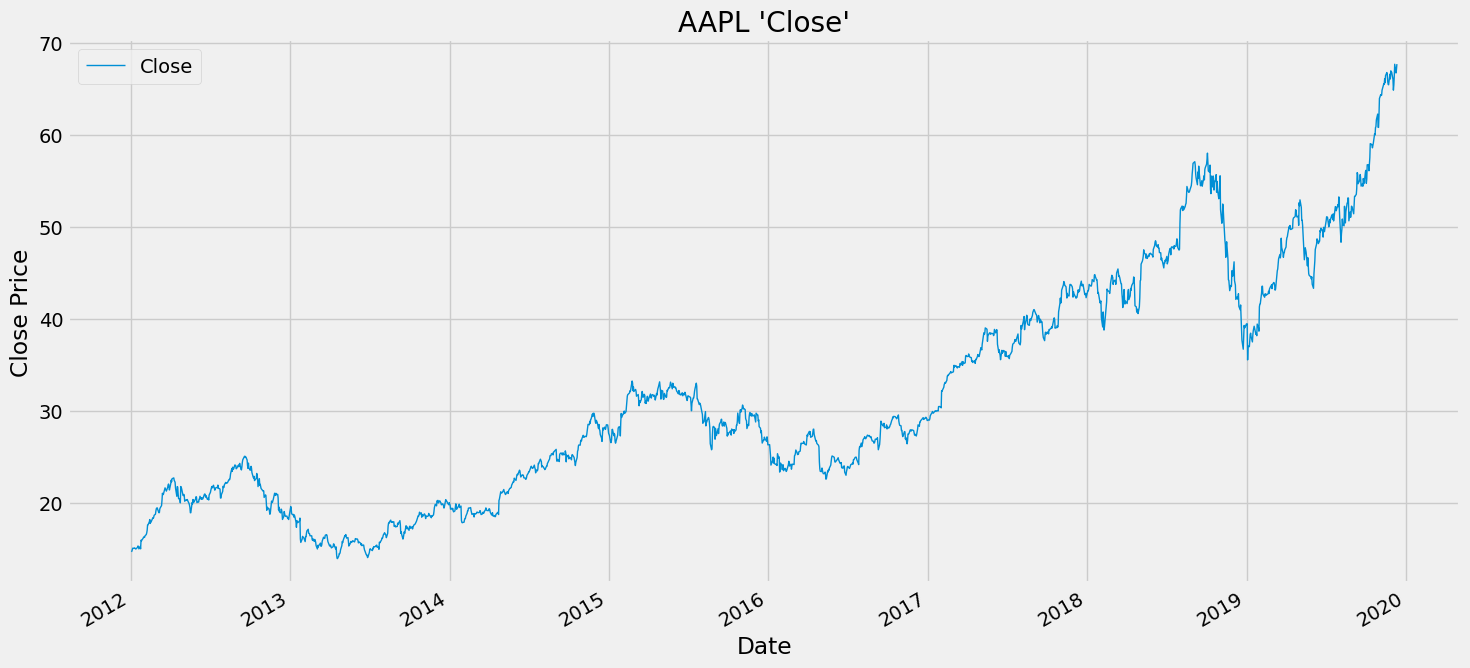

In [5]:
df.plot(figsize=(16,8),xlabel='Date',ylabel='Close Price',title="AAPL 'Close'",legend="Close",linewidth=1)

In [6]:
# decompose=result_mul = seasonal_decompose(df,model='additive', extrapolate_trend='freq',period=2)
# decompose.plot()

Plot ACF & PACF

In [7]:
# Draw Plot
# fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
# plot_acf(df.values.tolist(), lags=20, ax=axes[0])
# plot_pacf(df.values.tolist(), lags=20, ax=axes[1])


Check For Stationarity

In [8]:
# dftest=adfuller(dataSet['Close'],autolag="AIC")
# print(f"1- ADF :{dftest[0]}")
# print(f"2- P-Value :{dftest[1]}")
# print(f"3- Num Of Lags : {dftest[2]}")
# print(f"Num Of Obs Used For ADF Reg And CVC : {dftest[3]}")
# print(f"Critical Values :")
# for key,val in dftest[4].items():
#     print(f"\t ,{key} : {val}")

Split Data into Training and Testing Data

In [9]:
# number of data train
num_data_train = math.floor(len(df)*.9)
# get x_train and x_test
train=df[:num_data_train]
test=df[num_data_train:]


Plot Train Data and Test Data

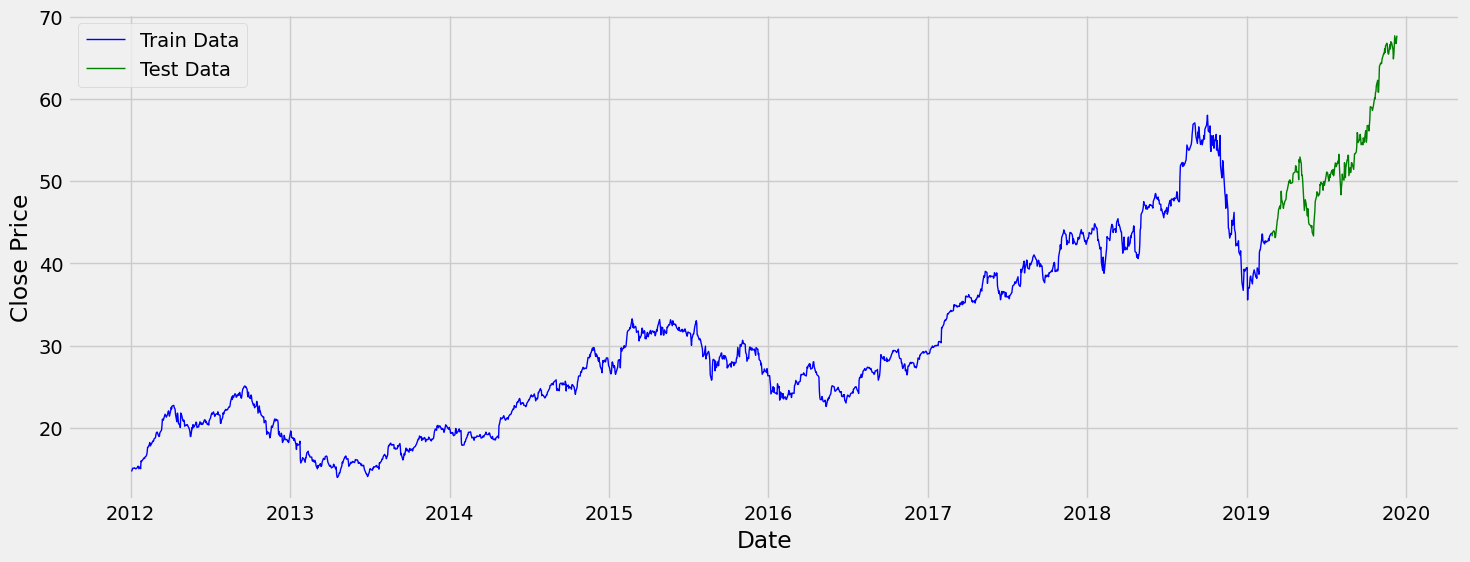

In [10]:
plt.figure(figsize=(16,6))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.plot(train,"blue",label="Train Data",linewidth=1)
plt.plot(test,"red",label="Test Data",linewidth=1)
plt.legend()
plt.show()

In [11]:
stepwise_fit=auto_arima(train,trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=14.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2564.891, Time=0.82 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2566.512, Time=0.59 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2566.472, Time=1.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2564.817, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2567.066, Time=4.41 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 23.186 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1799
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1281.409
Date:                Thu, 30 Mar 2023   AIC                           2564.817
Time:                        18:03:58   BIC                           2570.312
Sample:                             0   HQIC                          2566.845
                               - 1799                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.2435      0.004     67.098      0.000       0.236       0.251
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):              5005.26
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               3.86   Skew:                            -0.54
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Prediction

In [13]:
prediction=[]
training_data=list(train)
testing_data=list(test)
n_test_obser=len(testing_data)
for n in range(n_test_obser):
    model=ARIMA(training_data,order=(0,1,0))
    model_fit=model.fit()
    # output=model_fit.predict()
    output=model_fit.forecast()
    prediction.append(output)
    training_data.append(testing_data[n])


        

In [24]:
data_range=test.index




200

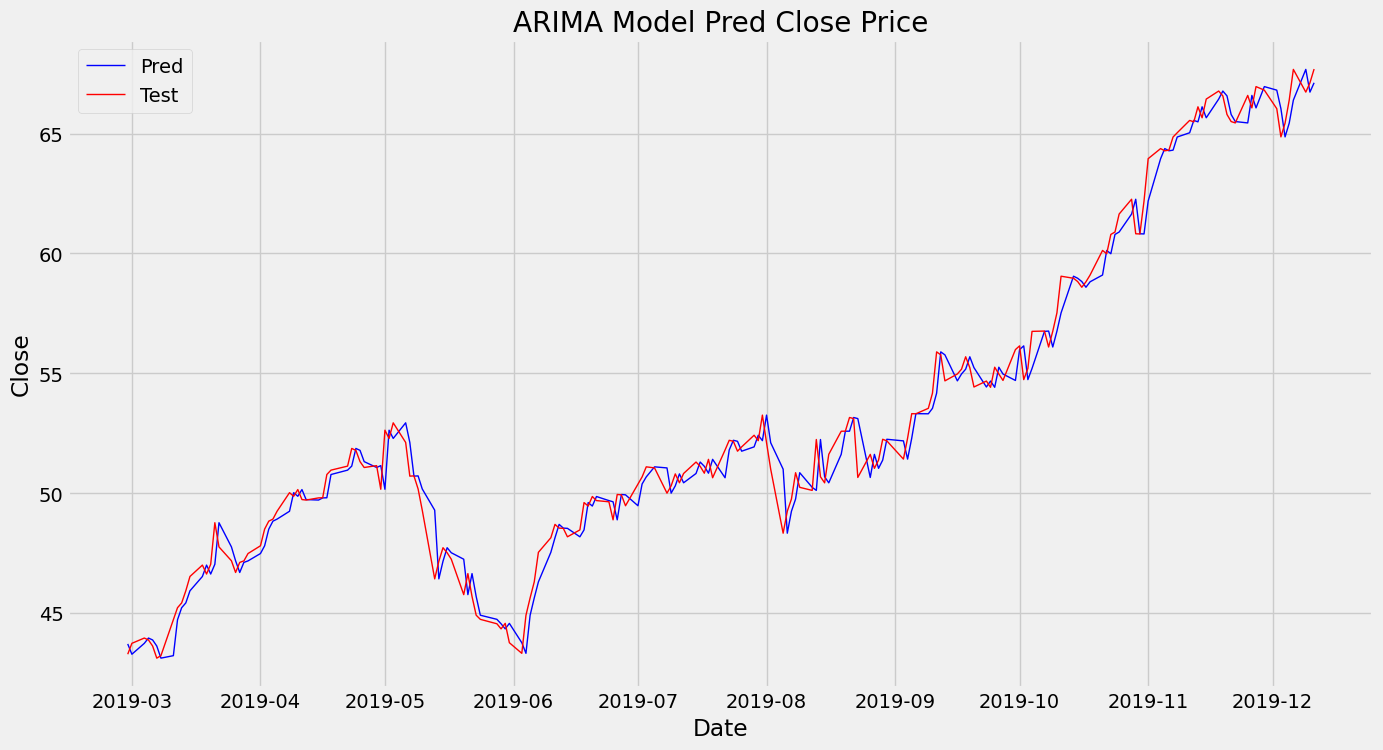

In [25]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.title("ARIMA Model")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data_range,prediction,color="blue",label="Pred",linewidth=1)
plt.plot(data_range,testing_data,color="red",label="Test",linewidth=1)
plt.legend()
plt.show()


In [26]:
print(f"MAE : {mean_absolute_error(testing_data,prediction)}")
print(f"MSE : {mean_squared_error(testing_data,prediction)}")

MAE : 0.6021749200000004
MSE : 0.6315355171035805
